In [1]:
# import dependencies
# load csv
# drop NAs? scale data? scatter plots...
# do a heat map to show NAs
# linear regression model
# for loop to test multiple models at once
# 

In [15]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [3]:
df = pd.read_csv(Path('./austinHousingData_copy.csv'))
df.head()

,latestPrice,propertyTaxRate,garageSpaces,numPriceChanges,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms
0,305000,1.98,2,5,6011.0,2601,2.666667,3.0,4
1,295000,1.98,2,1,6185.0,1768,2.666667,2.0,4
2,256125,1.98,0,1,7840.0,1478,3.000000,2.0,3
3,240000,1.98,2,4,6098.0,1678,2.666667,2.0,3
4,239900,1.98,0,3,6708.0,2132,4.000000,3.0,3


In [4]:
# if there are categorical variables, apply the getdummies or labelencoder method first here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latestPrice      15171 non-null  int64  
 1   propertyTaxRate  15171 non-null  float64
 2   garageSpaces     15171 non-null  int64  
 3   numPriceChanges  15171 non-null  int64  
 4   lotSizeSqFt      15171 non-null  float64
 5   livingAreaSqFt   15171 non-null  int64  
 6   avgSchoolRating  15171 non-null  float64
 7   numOfBathrooms   15171 non-null  float64
 8   numOfBedrooms    15171 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.0 MB


In [6]:
df.numPriceChanges.value_counts()

1     5029
2     3345
3     2193
4     1557
5     1004
6      688
7      440
8      297
9      180
10     136
12      84
11      81
13      51
14      33
15      22
16      11
17       7
18       5
19       4
22       2
23       1
20       1
Name: numPriceChanges, dtype: int64

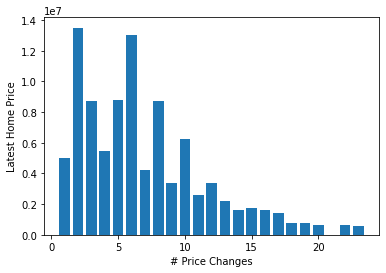

In [7]:
# enter scatter plots before scaled here
plt.bar(df.numPriceChanges, df.latestPrice)
plt.xlabel('# Price Changes')
plt.ylabel('Latest Home Price')
plt.show()

In [8]:
# scale the data
data_scaler = StandardScaler()
df_scaled = data_scaler.fit_transform(df)
df_scaled[:5]

array([[-0.458476  , -0.26524841,  0.57009709,  0.79085774, -0.0092287 ,
         0.28485161, -1.673595  ,  0.30063214,  0.65844366],
       [-0.48054276, -0.26524841,  0.57009709, -0.81730535, -0.0092145 ,
        -0.31941495, -1.673595  , -0.6477652 ,  0.65844366],
       [-0.56632727, -0.26524841, -0.90911326, -0.81730535, -0.00907942,
        -0.52978387, -1.49440418, -0.6477652 , -0.5181463 ],
       [-0.60190992, -0.26524841,  0.57009709,  0.38881697, -0.0092216 ,
        -0.38470186, -1.673595  , -0.6477652 , -0.5181463 ],
       [-0.60213058, -0.26524841, -0.90911326, -0.0132238 , -0.00917182,
        -0.0553657 , -0.95683172,  0.30063214, -0.5181463 ]])

In [9]:
df_scaled[:,0]

array([-0.458476  , -0.48054276, -0.56632727, ...,  0.79932907,
       -0.20470831, -0.30422938])

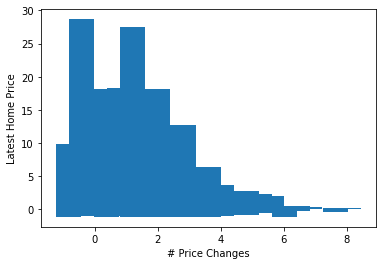

In [10]:
# bar plot using scaled data
plt.bar(df_scaled[:,3], df_scaled[:,0])
plt.xlabel('# Price Changes')
plt.ylabel('Latest Home Price')
plt.show()

In [ ]:
# Eventually add skatter plots of y vs. continuous variable (x) for multiple independent variables (scaled or unscaled)
#plt.scatter(X, y)
#plt.plot(X, y_pred, color='red')
#plt.show()

In [11]:
# Check out M17.8.2 for setting y and X before ranking the variables by importance
y = df.latestPrice
X = df.copy()
X = X.drop("latestPrice", axis=1)
X.head(3)

,propertyTaxRate,garageSpaces,numPriceChanges,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms
0,1.98,2,5,6011.0,2601,2.666667,3.0,4
1,1.98,2,1,6185.0,1768,2.666667,2.0,4
2,1.98,0,1,7840.0,1478,3.000000,2.0,3


In [12]:
#x train and x test (unscaled data)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [16]:
# M17.8.3 to create random forest classifier and then rank the variables
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [17]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [19]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([280000, 350000, 390000, ..., 269900, 475000, 440000])

In [20]:
# Calculating the accuracy score. WHAT IS THE BEST WAY OR WAYS TO EVALUATE THE ACCURACY OF A RANDOM FOREST CLASSIFIER...
# ... ON A REGRESSION MODEL??
acc_score = accuracy_score(y_test, predictions)

NameError: name 'accuracy_score' is not defined

In [21]:
# Calculate feature importance in the Random Forest model. HOW DO WE KNOW IF ACCURATE?
importances = rf_model.feature_importances_
importances

array([0.013771  , 0.07227582, 0.12359945, 0.26758064, 0.28681419,
       0.1346626 , 0.0507913 , 0.050505  ])

In [ ]:
model = LinearRegression()
model.fit(X, y)
model = model.fit(X_train, y_train)

In [ ]:
# Making predictions using the testing data.
predictions = model.predict(X_test)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

In [ ]:
# explained variance score
print('Explained Variance Score of model is {}'.format(evs(y_test, predictions)))

# R-squared
print('R-Squared value of model is {}'.format(r2(y_test, predictions)))